In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import utils
from generator import Generator
import numpy as np
import matplotlib.pyplot as plt
import stats
import autoencoder

from   torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from   torchvision import datasets, transforms

In [15]:
def visualize(model, dataset, dataloader, num_to_plot=10):
    batch = iter(dataloader).next()[0]
    images = batch[:num_to_plot].clone()
    
    model.eval()
    output = model(images)

    for i in range(num_to_plot):
        plt.subplot(1,2,1)
        if dataset == 'mnist':
            plt.imshow(images[i].squeeze(0).numpy(), cmap='binary_r')
        if dataset == 'cifar':
            plt.imshow(images[i].numpy().transpose(1,2,0))            
        plt.title('Original')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1,2,2)
        if dataset == 'mnist':
            plt.imshow(output[0].detach()[i].squeeze(0).numpy(), cmap='binary_r')
        if dataset == 'cifar':
            plt.imshow(output[0].detach()[i].numpy().transpose(1,2,0))
        plt.title('Autoencoder output')
        plt.xticks([])
        plt.yticks([])
        plt.show()


Files already downloaded and verified
Files already downloaded and verified


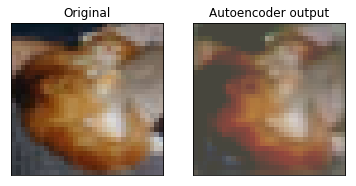

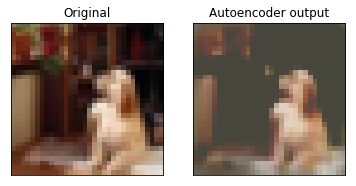

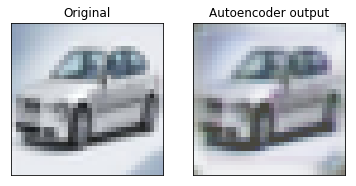

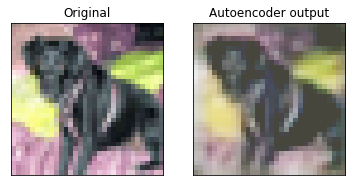

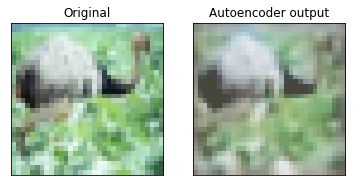

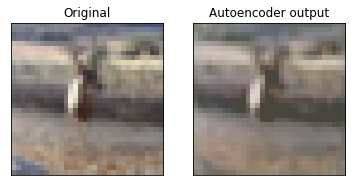

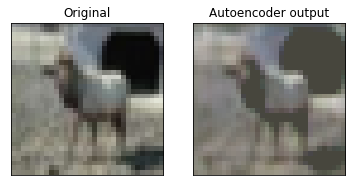

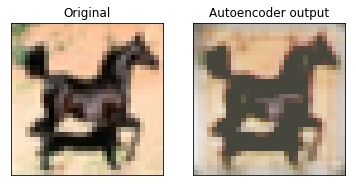

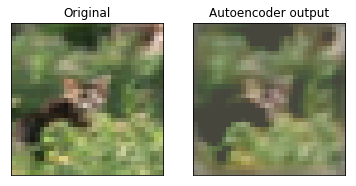

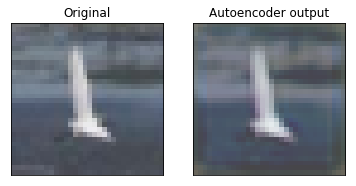

In [18]:
# Dataloaders
loader = utils.get_data('cifar', _train=True, _transforms=transforms.ToTensor())
test_loader = utils.get_data('cifar', _train=False, _transforms=transforms.ToTensor())
autoencoder_cifar = utils.trained_autoencoder('cifar')
visualize(autoencoder_cifar, 'cifar', test_loader)

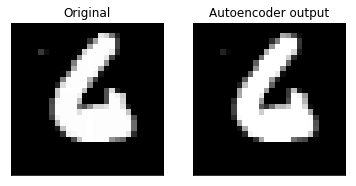

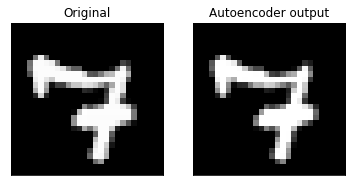

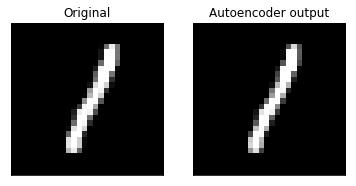

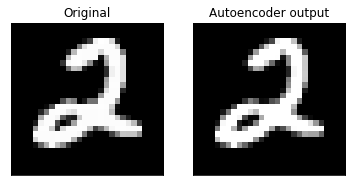

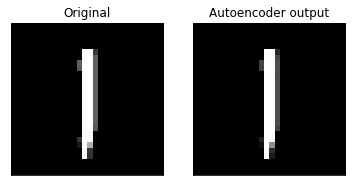

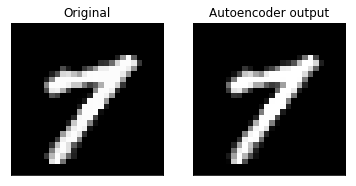

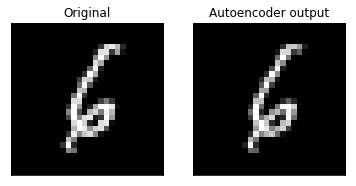

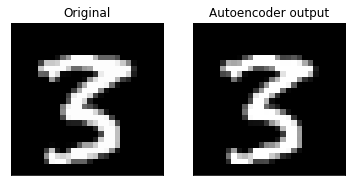

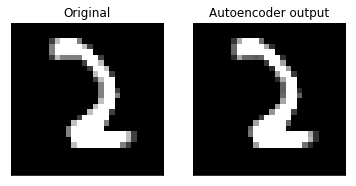

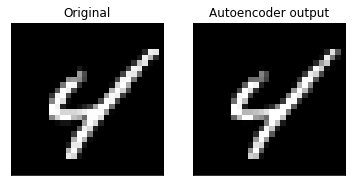

In [19]:
loader = utils.get_data('mnist', _train=True, _transforms=transforms.ToTensor())
test_loader = utils.get_data('mnist', _train=False, _transforms=transforms.ToTensor())
autoencoder_mnist = utils.trained_autoencoder('mnist')
visualize(autoencoder_mnist, 'mnist', test_loader)